# Import crucial libraries for plotting and exploring data

In [44]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
data = pd.read_csv('Team3_test_data.csv', encoding = 'utf-8')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


# Understanding the data

In [46]:
data.shape

(25976, 25)

In [47]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

# Dropping irrelevant columns

In [49]:
data = data[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction']].copy()

# Check data type for our features

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

# Change some features to categorical data type

In [51]:
categorical_data = [0, 1, 2, 3, 4] + list(range(6, 20))
data.iloc[:, categorical_data] = data.iloc[:, categorical_data].astype('category')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             25976 non-null  category
 1   Customer Type                      25976 non-null  category
 2   Age                                25976 non-null  category
 3   Type of Travel                     25976 non-null  category
 4   Class                              25976 non-null  category
 5   Flight Distance                    25976 non-null  int64   
 6   Inflight wifi service              25976 non-null  category
 7   Departure/Arrival time convenient  25976 non-null  category
 8   Ease of Online booking             25976 non-null  category
 9   Gate location                      25976 non-null  category
 10  Food and drink                     25976 non-null  category
 11  Online boarding                    25976 

# Checking for percentages of missing values inside each feature

In [53]:
data_with_nan = [features for features in data.columns if data[features].isnull().sum]
for feature in data_with_nan:
    print(feature, np.round(data[feature].isnull().mean(), 4), '% missing values')

Gender 0.0 % missing values
Customer Type 0.0 % missing values
Age 0.0 % missing values
Type of Travel 0.0 % missing values
Class 0.0 % missing values
Flight Distance 0.0 % missing values
Inflight wifi service 0.0 % missing values
Departure/Arrival time convenient 0.0 % missing values
Ease of Online booking 0.0 % missing values
Gate location 0.0 % missing values
Food and drink 0.0 % missing values
Online boarding 0.0 % missing values
Seat comfort 0.0 % missing values
Inflight entertainment 0.0 % missing values
On-board service 0.0 % missing values
Leg room service 0.0 % missing values
Baggage handling 0.0 % missing values
Checkin service 0.0 % missing values
Inflight service 0.0 % missing values
Cleanliness 0.0 % missing values
Departure Delay in Minutes 0.0 % missing values
Arrival Delay in Minutes 0.0032 % missing values
satisfaction 0.0 % missing values


# Fill missing value with mean value

In [54]:
data = data.fillna({'Arrival Delay in Minutes' : np.min(data['Arrival Delay in Minutes'])})

In [55]:
for feature in data_with_nan:
    print(feature, np.round(data[feature].isnull().mean(), 4), '% missing values')

Gender 0.0 % missing values
Customer Type 0.0 % missing values
Age 0.0 % missing values
Type of Travel 0.0 % missing values
Class 0.0 % missing values
Flight Distance 0.0 % missing values
Inflight wifi service 0.0 % missing values
Departure/Arrival time convenient 0.0 % missing values
Ease of Online booking 0.0 % missing values
Gate location 0.0 % missing values
Food and drink 0.0 % missing values
Online boarding 0.0 % missing values
Seat comfort 0.0 % missing values
Inflight entertainment 0.0 % missing values
On-board service 0.0 % missing values
Leg room service 0.0 % missing values
Baggage handling 0.0 % missing values
Checkin service 0.0 % missing values
Inflight service 0.0 % missing values
Cleanliness 0.0 % missing values
Departure Delay in Minutes 0.0 % missing values
Arrival Delay in Minutes 0.0 % missing values
satisfaction 0.0 % missing values


# Check the relationship between each features

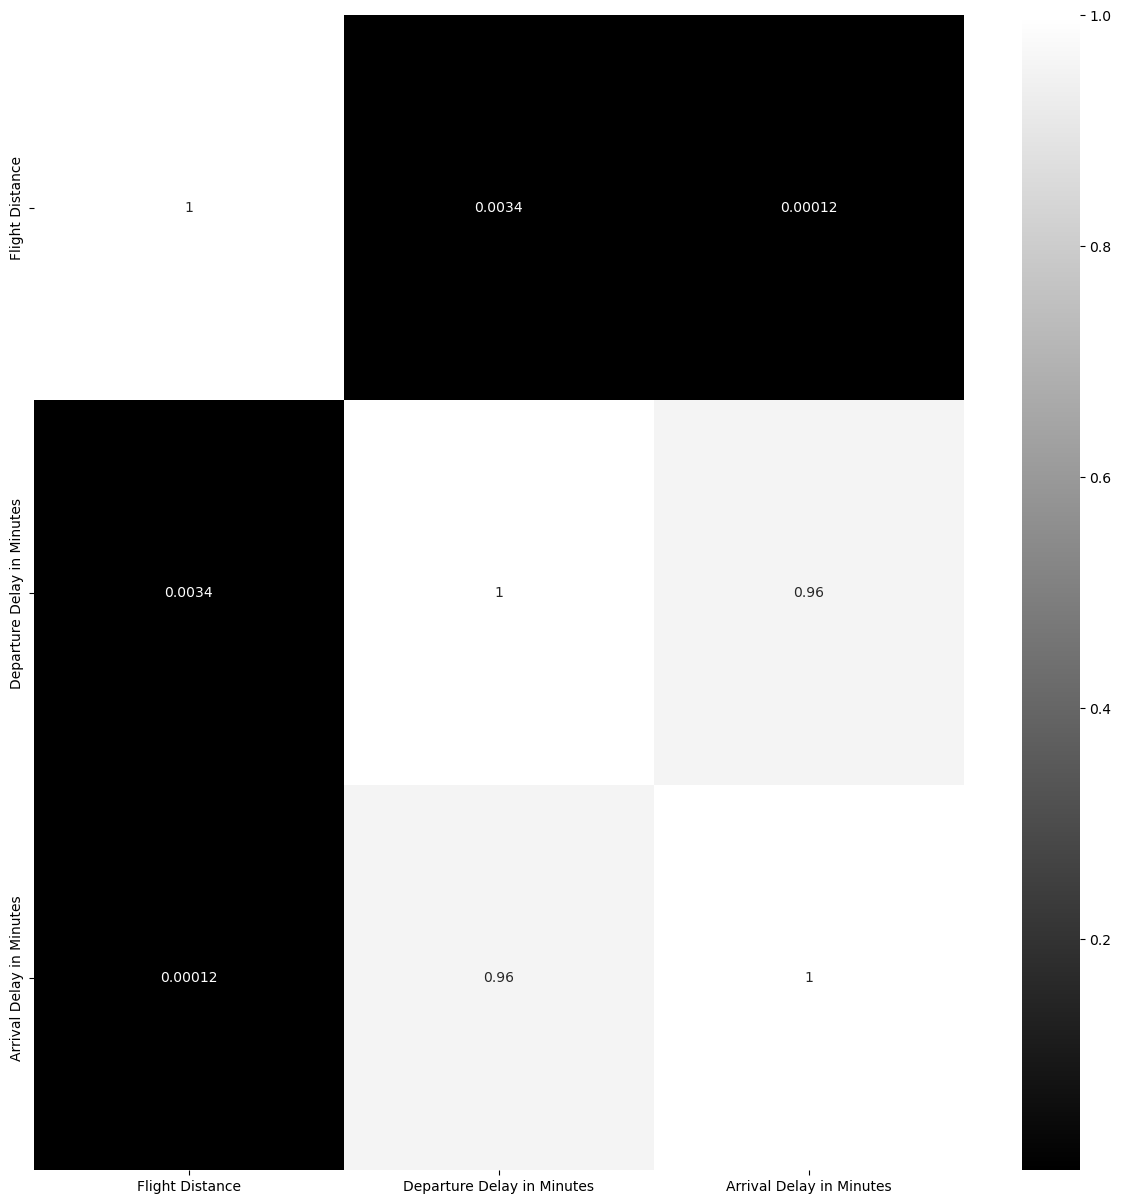

In [64]:
corr = data.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'gray')
plt.show()

# Checking for outliers

# Boxplot

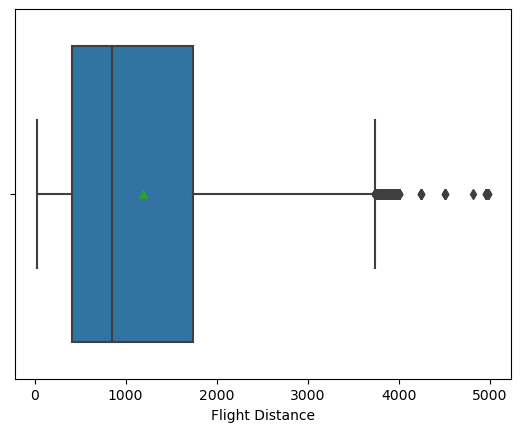

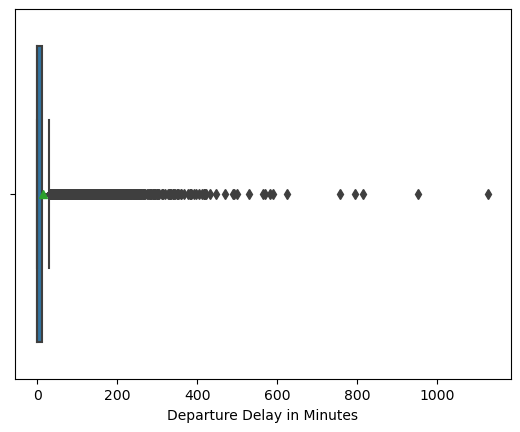

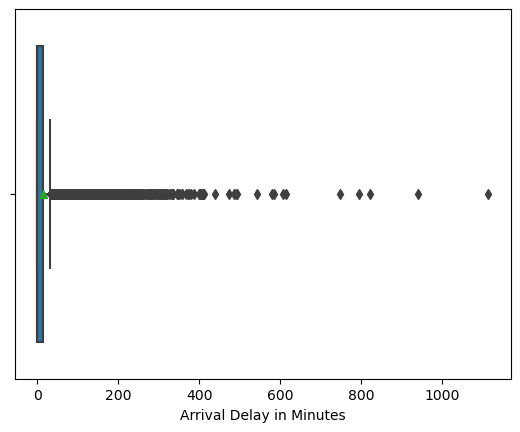

In [72]:
def plot_boxplot(data, feature):
        sns.boxplot(x = data[feature], showmeans = True, data = data)
        plt.show()

features = ['Flight Distance', 'Departure Delay in Minutes'  , 'Arrival Delay in Minutes']
for feature in features:
    plot_boxplot(data, feature)

> As we can see from those boxplots above, there are many outliers occured in some of our features in the dataset.

## Check the lower bound, upper bound , values and indices of the outliers

In [58]:
def detect_outlier(data_set):
    outlier_lst = []
    q1 = data_set.quantile(0.25)
    q3 = data_set.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    upper_outliers_index = data_set[data_set > upper_bound].index.tolist()
    lower_outliers_index = data_set[data_set < lower_bound].index.tolist()
    
#     upper_outliers = data_set[data_set > upper_bound].tolist()
#     lower_outliers = data_set[data_set < lower_bound]
    
    print(f'Outliers Index: ', upper_outliers_index)

In [59]:
print(detect_outlier(data['Flight Distance']))

Outliers Index:  [6, 19, 145, 170, 180, 273, 274, 305, 375, 434, 437, 452, 495, 610, 615, 753, 757, 768, 790, 794, 802, 853, 936, 946, 1003, 1062, 1125, 1171, 1245, 1279, 1285, 1355, 1358, 1390, 1435, 1490, 1527, 1538, 1590, 1598, 1888, 1898, 1937, 1961, 1980, 2017, 2144, 2187, 2263, 2269, 2284, 2313, 2342, 2427, 2432, 2532, 2570, 2621, 2668, 2680, 2683, 2699, 2824, 2958, 3027, 3043, 3134, 3138, 3152, 3194, 3236, 3482, 3485, 3502, 3553, 3617, 3645, 3662, 3673, 3705, 3795, 3953, 3973, 4001, 4007, 4011, 4044, 4054, 4130, 4220, 4320, 4366, 4411, 4452, 4454, 4498, 4517, 4562, 4566, 4619, 4643, 4667, 4710, 4787, 4897, 5100, 5161, 5206, 5263, 5290, 5330, 5351, 5358, 5368, 5384, 5404, 5459, 5476, 5510, 5585, 5599, 5608, 5677, 5726, 5820, 5824, 5829, 5891, 5892, 5893, 5896, 6031, 6073, 6098, 6099, 6107, 6134, 6166, 6198, 6209, 6323, 6348, 6358, 6421, 6476, 6671, 6736, 6776, 6793, 6895, 6949, 6982, 6998, 7011, 7023, 7051, 7067, 7078, 7126, 7145, 7211, 7291, 7334, 7336, 7530, 7543, 7560, 7731, 7

## Scatter plot 

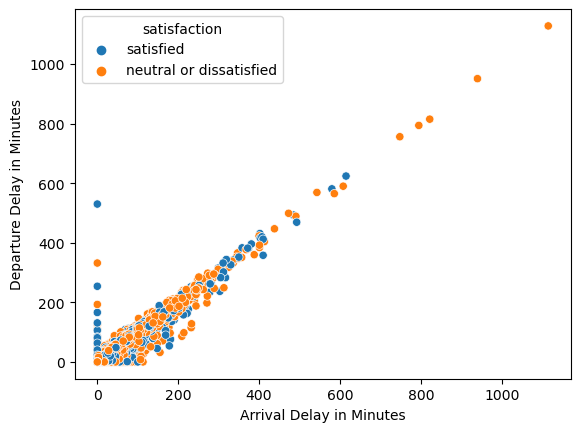

In [60]:
sns.scatterplot(x = "Arrival Delay in Minutes", y = "Departure Delay in Minutes", data = data, hue = "satisfaction")
plt.show()

###  Explaination: 

As we can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation the dependence of the arrival time delay on the departure time delay is linear.

The results obtained are quite logical and can be explained as follows. If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time).

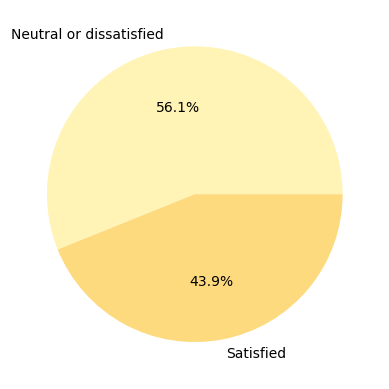

In [61]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
plt.show()

### Explaination:
As we can see from the pie chart above, it shows that the target variable of our data is more or less balanced.